# Data set for COVID India¶

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_india.csv')
#df=pd.read_csv('/content/covid_19_india.csv')
df.head()
df.tail()


,Unnamed: 0,States,Confirmed,Cured,Death,Active,Lat,Long
30,30,Telengana,3496,1710,123,1663,18.1124,79.0193
31,31,Tripura,747,173,0,574,23.9408,91.9882
32,32,Uttarakhand,1303,423,11,869,30.0668,79.0193
33,33,Uttar Pradesh,9733,5648,257,3828,26.8467,80.9462
34,34,West Bengal,7738,3119,383,4236,22.9868,87.8550


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['Active']=df['Confirmed']-df['Death']-df['Cured']
df.head()

,Unnamed: 0,States,Confirmed,Cured,Death,Active,Lat,Long
0,0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,3,Assam,2397,547,4,1846,26.2006,92.9376
4,4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [ ]:
tot_cases = df.groupby('States')['Active'].sum().sort_values(ascending=False).to_frame()
tot_cases.head(10)

,Active
States,
Maharashtra,42609
Delhi,16229
Tamil Nadu,13506
Gujarat,5057
West Bengal,4236
Uttar Pradesh,3828
Karnataka,3186
Madhya Pradesh,2721
Rajasthan,2599


In [ ]:
tot_cases.style.background_gradient(cmap='Spectral')

,Active
States,
Maharashtra,42609
Delhi,16229
Tamil Nadu,13506
Gujarat,5057
West Bengal,4236
Uttar Pradesh,3828
Karnataka,3186
Madhya Pradesh,2721
Rajasthan,2599


# Total vs Recovered Cases

In [ ]:
df.head()

,Unnamed: 0,States,Confirmed,Cured,Death,Active,Lat,Long
0,0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,3,Assam,2397,547,4,1846,26.2006,92.9376
4,4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [ ]:
data = df[['States','Confirmed','Death','Cured','Active']]
data.sort_values('Confirmed',ascending=False,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


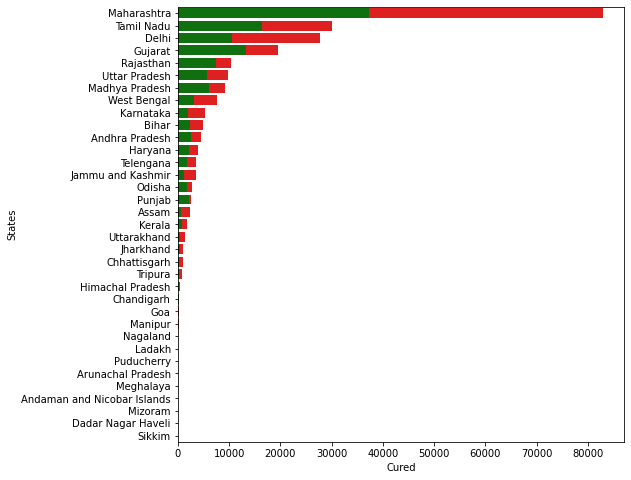

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.barplot(x=data['Confirmed'],y=data['States'],label="Total Confirmed Cases",color='red')
sns.barplot(x=data['Cured'],y=data['States'],label="Total Recovered Cases",color='green')
plt.show()
#plt.savefig('output.png', dpi=300, bbox_inches='tight')


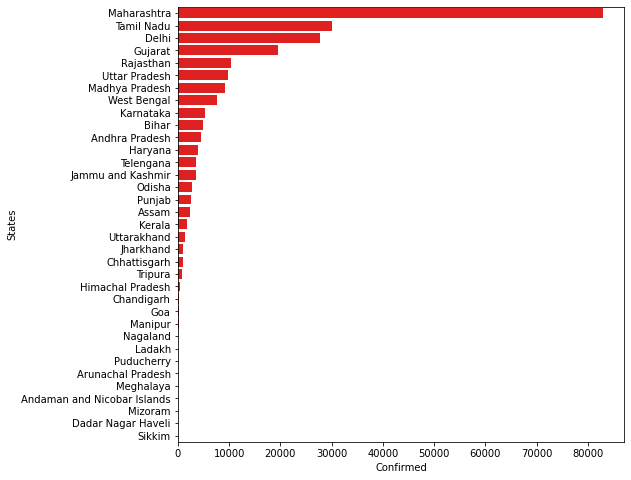

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Confirmed'],y=data['States'],label="Total Confirmed Cases",color='red')
plt.show()

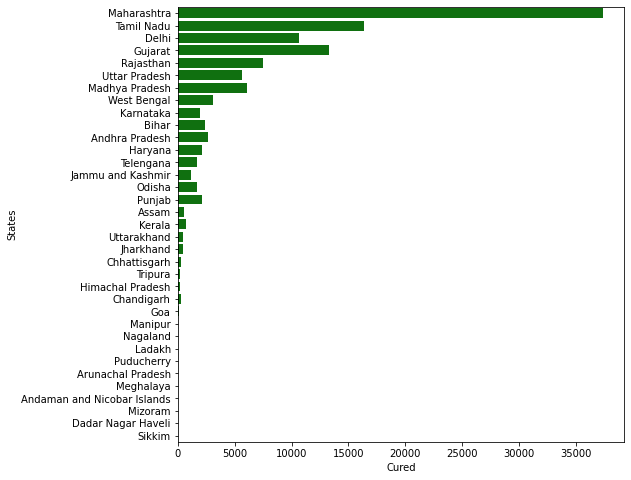

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Cured'],y=data['States'],label="Total Recovered Cases",color='green')
plt.show()

# COVID-19 World Wide Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# import data
df = pd.read_csv('https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv')
#df=pd.read_csv('https://github.com/abhithakur25/COVID-19/blob/master/covid_19_india.csv')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38884,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,NaN,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,NaN,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,NaN,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe
38888,NaN,Lesotho,-29.609988,28.233608,2020-06-18,4,0,2,2,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11622 non-null  object 
 1   Country/Region  38889 non-null  object 
 2   Lat             38889 non-null  float64
 3   Long            38889 non-null  float64
 4   Date            38889 non-null  object 
 5   Confirmed       38889 non-null  int64  
 6   Deaths          38889 non-null  int64  
 7   Recovered       38889 non-null  int64  
 8   Active          38889 non-null  int64  
 9   WHO Region      38889 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [ ]:
df.rename(columns={"Province/State":"state","Country/Region":"country"},inplace=True)
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df.tail()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38884,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,NaN,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,NaN,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,NaN,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe
38888,NaN,Lesotho,-29.609988,28.233608,2020-06-18,4,0,2,2,Africa


# Top Countries having cases

In [ ]:
df[df['Date']=='2021-06-06']
top = df[df['Date'] == df['Date'].max()]
top.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38628,NaN,Afghanistan,33.0000,65.0000,2020-06-18,27532,546,7660,19326,Eastern Mediterranean
38629,NaN,Albania,41.1533,20.1683,2020-06-18,1788,39,1086,663,Europe
38630,NaN,Algeria,28.0339,1.6596,2020-06-18,11385,811,8078,2496,Africa
38631,NaN,Andorra,42.5063,1.5218,2020-06-18,855,52,792,11,Europe
38632,NaN,Angola,-11.2027,17.8739,2020-06-18,166,8,64,94,Africa


In [ ]:
world = top.groupby('country')['Confirmed','Recovered','Deaths','Active'].sum()
world.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Recovered,Deaths,Active
country,,,,
Afghanistan,27532,7660,546,19326
Albania,1788,1086,39,663
Algeria,11385,8078,811,2496
Andorra,855,792,52,11
Angola,166,64,8,94


In [ ]:
world = top.groupby('country')['Confirmed','Recovered','Deaths','Active'].sum()
world.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Recovered,Deaths,Active
country,,,,
Afghanistan,27532,7660,546,19326
Albania,1788,1086,39,663
Algeria,11385,8078,811,2496
Andorra,855,792,52,11
Angola,166,64,8,94


In [ ]:
world = top.groupby('country')['Confirmed','Recovered','Deaths','Active'].sum().reset_index()
world.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,Confirmed,Recovered,Deaths,Active
0,Afghanistan,27532,7660,546,19326
1,Albania,1788,1086,39,663
2,Algeria,11385,8078,811,2496
3,Andorra,855,792,52,11
4,Angola,166,64,8,94


In [ ]:
world_map = px.choropleth(world,locations='country',locationmode='country names', color = 'Active',hover_name="country",range_color=[1,1000],color_continuous_scale="rainbow",title="Country With Active Cases")
world_map.show()

# World wide confirmed cases over time

In [ ]:
total_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_cases.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
total_cases.tail()

,Date,Confirmed
144,2020-06-14,7911685
145,2020-06-15,8033720
146,2020-06-16,8173199
147,2020-06-17,8349209
148,2020-06-18,8488235


# Top 20 countries with active cases

In [ ]:
top.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38628,NaN,Afghanistan,33.0000,65.0000,2020-06-18,27532,546,7660,19326,Eastern Mediterranean
38629,NaN,Albania,41.1533,20.1683,2020-06-18,1788,39,1086,663,Europe
38630,NaN,Algeria,28.0339,1.6596,2020-06-18,11385,811,8078,2496,Africa
38631,NaN,Andorra,42.5063,1.5218,2020-06-18,855,52,792,11,Europe
38632,NaN,Angola,-11.2027,17.8739,2020-06-18,166,8,64,94,Africa


In [ ]:
top_active=top.groupby('country')['Active'].sum().reset_index()
top_active.head(20)

,country,Active
0,Afghanistan,19326
1,Albania,663
2,Algeria,2496
3,Andorra,11
4,Angola,94
5,Antigua and Barbuda,1
6,Argentina,25841
7,Armenia,10829
8,Australia,429
9,Austria,434


In [ ]:
top_actives = top.groupby('country')['Active'].sum().sort_values(ascending=False).reset_index().head(20)
top_actives

,country,Active
0,US,1473503
1,Brazil,395814
2,United Kingdom,258249
3,Russia,239262
4,India,163248
5,Peru,105737
6,Pakistan,100450
7,Canada,93504
8,France,91655
9,Spain,67756


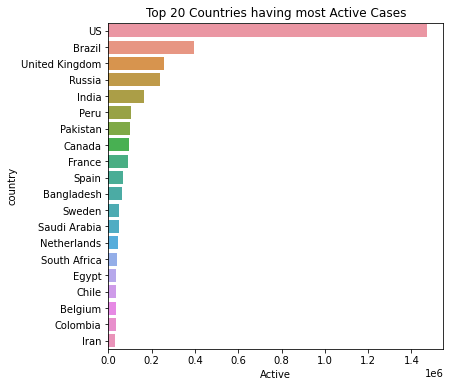

In [ ]:
plt.figure(figsize=(6,6))
plt.ylabel("Country",fontsize=10)
plt.xlabel("Active Cases",fontsize=10)
plt.title("Top 20 Countries having most Active Cases",fontsize=12)
sns.barplot(x=top_actives['Active'],y=top_actives['country'])
plt.show() 

In [ ]:
top_Deaths = top.groupby('country')['Deaths'].sum().sort_values(ascending=False).reset_index().head(20)
top_Deaths

,country,Deaths
0,US,118434
1,Brazil,47748
2,United Kingdom,42373
3,Italy,34514
4,France,29606
5,Spain,27136
6,Mexico,19747
7,India,12573
8,Belgium,9683
9,Iran,9272


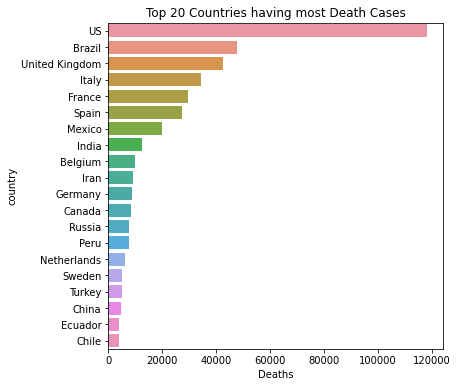

In [ ]:
plt.figure(figsize=(6,6))
plt.ylabel("Country",fontsize=10)
plt.xlabel("Deaths Cases",fontsize=10)
plt.title("Top 20 Countries having most Death Cases",fontsize=12)
sns.barplot(x=top_Deaths['Deaths'],y=top_Deaths['country'])
plt.show() 

# Making some dataframes of some countries

In [ ]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
china=df[df['country']=='China']
china.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,37.8099,101.0583,2020-01-22,0,0,0,0,Western Pacific


In [ ]:
china = df[df['country']=='China']
china =china.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
china.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970


In [ ]:
us = df[df['country']=='US']
us.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
us.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,37.0902,-95.7129,2020-01-22,1,0,0,1,Americas
484,NaN,US,37.0902,-95.7129,2020-01-23,1,0,0,1,Americas
745,NaN,US,37.0902,-95.7129,2020-01-24,2,0,0,2,Americas
1006,NaN,US,37.0902,-95.7129,2020-01-25,2,0,0,2,Americas
1267,NaN,US,37.0902,-95.7129,2020-01-26,5,0,0,5,Americas


In [ ]:
italy = df[df['country']=='Italy']
italy =italy.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
italy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [ ]:
india = df[df['country']=='India']
india =india.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
india.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


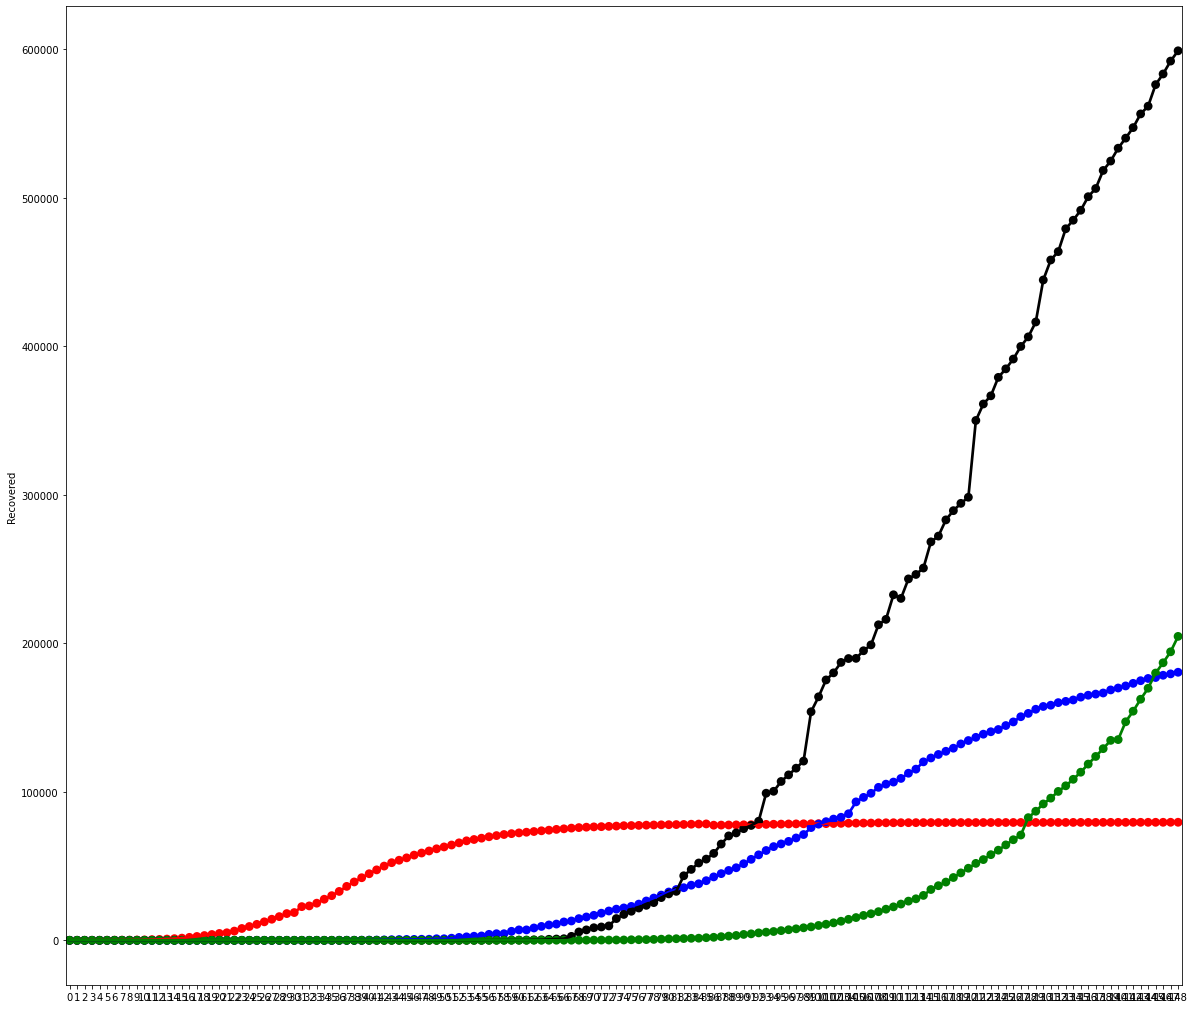

In [ ]:
plt.figure(figsize=(20,18))
sns.pointplot(x=china.index,y=china['Recovered'],color='red')
sns.pointplot(x=italy.index,y=italy['Recovered'],color='blue')
sns.pointplot(x=us.index,y=us['Recovered'],color='black')
sns.pointplot(x=india.index,y=india['Recovered'],color='green')
plt.show()

# Prediction & Forecasting (Time Series Analysis)

In [ ]:
from fbprophet import Prophet

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       11622 non-null  object 
 1   country     38889 non-null  object 
 2   Lat         38889 non-null  float64
 3   Long        38889 non-null  float64
 4   Date        38889 non-null  object 
 5   Confirmed   38889 non-null  int64  
 6   Deaths      38889 non-null  int64  
 7   Recovered   38889 non-null  int64  
 8   Active      38889 non-null  int64  
 9   WHO Region  38889 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [ ]:
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


# Prediction Forecasting for confirmed cases

In [ ]:
confirmed.rename(columns={"Date":'ds','Confirmed':'y'},inplace=True)
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
# Build the model
m=Prophet(interval_width=0.95)

In [ ]:
# Apply the date to the model
m.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=7)
future.tail(7)

,ds
149,2020-06-19
150,2020-06-20
151,2020-06-21
152,2020-06-22
153,2020-06-23
154,2020-06-24
155,2020-06-25


In [ ]:
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-8025.915557,-67396.117642,50141.706028,-8025.915557,-8025.915557,-1934.759207,-1934.759207,-1934.759207,-1934.759207,-1934.759207,-1934.759207,0.0,0.0,0.0,-9960.674765
1,2020-01-23,-5317.099318,-62957.494156,52215.887373,-5317.099318,-5317.099318,3756.729985,3756.729985,3756.729985,3756.729985,3756.729985,3756.729985,0.0,0.0,0.0,-1560.369333
2,2020-01-24,-2608.283078,-59866.760259,57019.871296,-2608.283078,-2608.283078,1663.717096,1663.717096,1663.717096,1663.717096,1663.717096,1663.717096,0.0,0.0,0.0,-944.565982
3,2020-01-25,100.533162,-55043.043889,61507.661186,100.533162,100.533162,3710.564360,3710.564360,3710.564360,3710.564360,3710.564360,3710.564360,0.0,0.0,0.0,3811.097521
4,2020-01-26,2809.349401,-53782.219047,62619.275574,2809.349401,2809.349401,1656.522054,1656.522054,1656.522054,1656.522054,1656.522054,1656.522054,0.0,0.0,0.0,4465.871455


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
149,2020-06-19,8.461686e+06,8.405969e+06,8.516031e+06
150,2020-06-20,8.580854e+06,8.525061e+06,8.641930e+06
151,2020-06-21,8.695921e+06,8.638579e+06,8.757770e+06
152,2020-06-22,8.807699e+06,8.747259e+06,8.867107e+06
153,2020-06-23,8.923342e+06,8.854822e+06,8.994275e+06
154,2020-06-24,9.043694e+06,8.966373e+06,9.116983e+06
155,2020-06-25,9.166507e+06,9.086166e+06,9.249753e+06


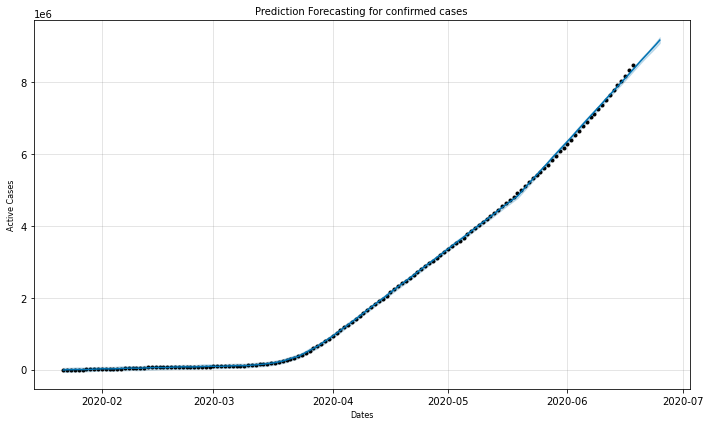

In [ ]:
cofirmed_plot = m.plot(forecast)
#plt.figure(figsize=(15,10))
plt.ylabel("Active Cases",fontsize=8)
plt.xlabel("Dates",fontsize=8)
plt.title("Prediction Forecasting for confirmed cases",fontsize=10)
plt.show()

In [ ]:
from fbprophet.diagnostics import cross_validation as c
cv=c(m,horizon='7 days')
cv.head()

INFO:fbprophet:Making 35 forecasts with cutoffs between 2020-02-13 00:00:00 and 2020-06-11 00:00:00


  0%|          | 0/35 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-14,56710.137566,53617.011911,59704.901901,66667,2020-02-13
1,2020-02-15,59165.444270,56163.155355,62283.704780,68745,2020-02-13
2,2020-02-16,62662.562409,59366.136042,66012.173458,70869,2020-02-13
3,2020-02-17,65487.281702,62259.923063,68701.212637,72804,2020-02-13
4,2020-02-18,69064.577660,65677.985127,72531.266044,74594,2020-02-13


In [ ]:
cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
240,2020-06-14,7.718860e+06,7.664862e+06,7.772282e+06,7911685,2020-06-11
241,2020-06-15,7.820445e+06,7.764012e+06,7.879165e+06,8033720,2020-06-11
242,2020-06-16,7.925957e+06,7.866759e+06,7.988370e+06,8173199,2020-06-11
243,2020-06-17,8.036467e+06,7.964402e+06,8.106030e+06,8349209,2020-06-11
244,2020-06-18,8.148616e+06,8.073206e+06,8.225618e+06,8488235,2020-06-11


In [ ]:
from fbprophet.diagnostics import cross_validation
cv=cross_validation(m,horizon='7 days')


INFO:fbprophet:Making 35 forecasts with cutoffs between 2020-02-13 00:00:00 and 2020-06-11 00:00:00


  0%|          | 0/35 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
from fbprophet.diagnostics import performance_metrics
pm = performance_metrics(cv)
pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days 00:00:00,4.780835e+09,69143.584053,51254.839607,0.072262,0.017468,0.198529
1,1 days 12:00:00,5.571792e+09,74644.440411,54609.517616,0.075421,0.026457,0.256944
2,2 days 00:00:00,7.544375e+09,86858.360258,63468.938799,0.083210,0.035791,0.198529
3,2 days 12:00:00,8.736535e+09,93469.434164,68310.806952,0.085301,0.029827,0.215278
4,3 days 00:00:00,1.061880e+10,103047.580580,75584.726960,0.092823,0.036797,0.225490
5,3 days 12:00:00,1.275935e+10,112957.281915,82923.723679,0.095824,0.028187,0.273148
6,4 days 00:00:00,1.390995e+10,117940.468471,86620.951373,0.102396,0.074047,0.198529
7,4 days 12:00:00,1.758136e+10,132594.725002,97647.923192,0.108443,0.038992,0.256944
8,5 days 00:00:00,1.899205e+10,137811.636655,100765.132301,0.112162,0.037367,0.240196
9,5 days 12:00:00,2.375747e+10,154134.579564,112730.883415,0.116571,0.031852,0.273148


In [ ]:
pm['mape'].mean()*100

10.183157630420467

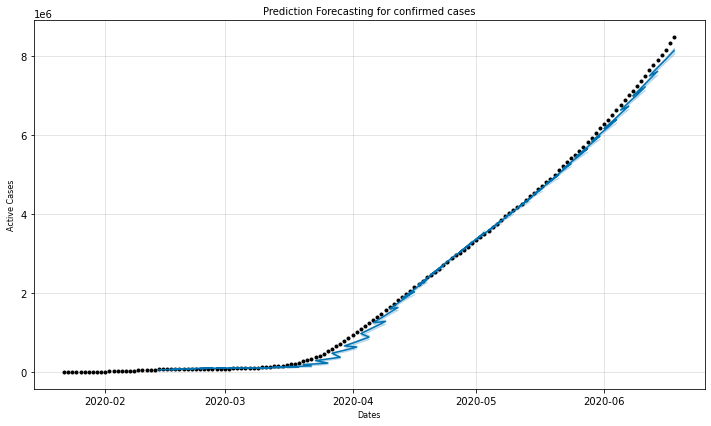

In [ ]:
cofirmed_plot = m.plot(cv)
#plt.figure(figsize=(15,10))
plt.ylabel("Active Cases",fontsize=8)
plt.xlabel("Dates",fontsize=8)
plt.title("Prediction Forecasting for confirmed cases",fontsize=10)
plt.show()